# Investigating the globular cluster 47 Tuc with Gaia

Setting output resolution to "retina", importing packages, and changing font size of plots:

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':16})

## Introduction

The data files 47tuc_positions.csv and 47tuc_gaia_data.csv were provided, which both contain data about a set of stars within n the globular cluster 47 Tuc, from the Gaia mission. The data in the first data set, 47tuc_positions.csv tells us the star's ID, Right Ascension (in degrees), Declination (in degrees) and estimated distance from Earth (in parsecs). The 47tuc_gaia_data.csv data set tells us the stars ID, Right Ascension (in degrees), Declination (in degrees), apparent G-band magnitude (mags), (B – R) colour (mags), Right Ascension proper motion (milli arcseconds / year), Declination proper motion (milli arcseconds / year). As some of the data is repeated in both of these datafiles, he files can be merged so that there is one datafile with all of the information. Some of the columns contain information which is not needed for this analysid, and so they will be removed. Once the data has been cleaned, the data will narrowed down into only the stars in the cluster for analysis.

## Data cleaning

Saving the data files in as pandas dataframes so that they can be read into python and used in the code:

In [2]:
positions = pd.read_csv('./47tuc_positions.csv')

gaia_data = pd.read_csv('./47tuc_gaia_data.csv')

Reading and displaying the raw data:

In [3]:
positions

,source_id,ra,dec,r_est
0,4689544567094557440,5.575178,-72.502891,2497.265269
1,4689541955754300672,4.999976,-72.646056,2181.867979
2,4689541234199794816,5.225171,-72.642103,2503.651243
3,4689544017338680832,5.331235,-72.556081,1994.822273
4,4689544498377649920,5.580270,-72.515469,2083.603799
...,...,...,...,...
7829,4689186710427822208,8.127774,-72.306048,2307.265411
7830,4689185409053789184,7.606001,-72.385654,3289.627814
7831,4689184653139542784,7.839720,-72.398244,2208.797769
7832,4689185988873307392,7.748262,-72.335691,2233.294279


In [4]:
gaia_data

,source_id,ra,dec,phot_g_mean_mag,bp_rp,pmra,pmdec
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,4.950253,-1.995966
1,4689541955754300672,4.999976,-72.646056,19.119717,1.259825,0.715769,-1.697977
2,4689541234199794816,5.225171,-72.642103,18.516747,1.046042,10.724800,-2.139549
3,4689544017338680832,5.331235,-72.556081,19.336916,1.018908,-0.342772,-1.584548
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,0.022935,-1.184934
...,...,...,...,...,...,...,...
7829,4689186710427822208,8.127774,-72.306048,18.929136,1.169840,-0.004100,-0.778814
7830,4689185409053789184,7.606001,-72.385654,17.482525,0.769182,5.657913,-2.322869
7831,4689184653139542784,7.839720,-72.398244,19.023027,1.131882,0.117420,-1.456918
7832,4689185988873307392,7.748262,-72.335691,19.135883,0.890472,0.672103,-1.680693


Both sets of data include the columns source_id, ra, and dec, and so they will be merged in a way that these columns only appear once. The columns pmra and pmdec aren't necessary to this analysis, and so they can be removed:

In [5]:
data = pd.merge(left=gaia_data, right=positions, on=['source_id', 'ra', 'dec'], how='left')

data = data.drop('pmra', axis = 1)
data = data.drop('pmdec', axis = 1)

data

,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269
1,4689541955754300672,4.999976,-72.646056,19.119717,1.259825,2181.867979
2,4689541234199794816,5.225171,-72.642103,18.516747,1.046042,2503.651243
3,4689544017338680832,5.331235,-72.556081,19.336916,1.018908,1994.822273
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799
...,...,...,...,...,...,...
7829,4689186710427822208,8.127774,-72.306048,18.929136,1.169840,2307.265411
7830,4689185409053789184,7.606001,-72.385654,17.482525,0.769182,3289.627814
7831,4689184653139542784,7.839720,-72.398244,19.023027,1.131882,2208.797769
7832,4689185988873307392,7.748262,-72.335691,19.135883,0.890472,2233.294279


Plotting Right Ascension vs Declination to create an image of the cluster:

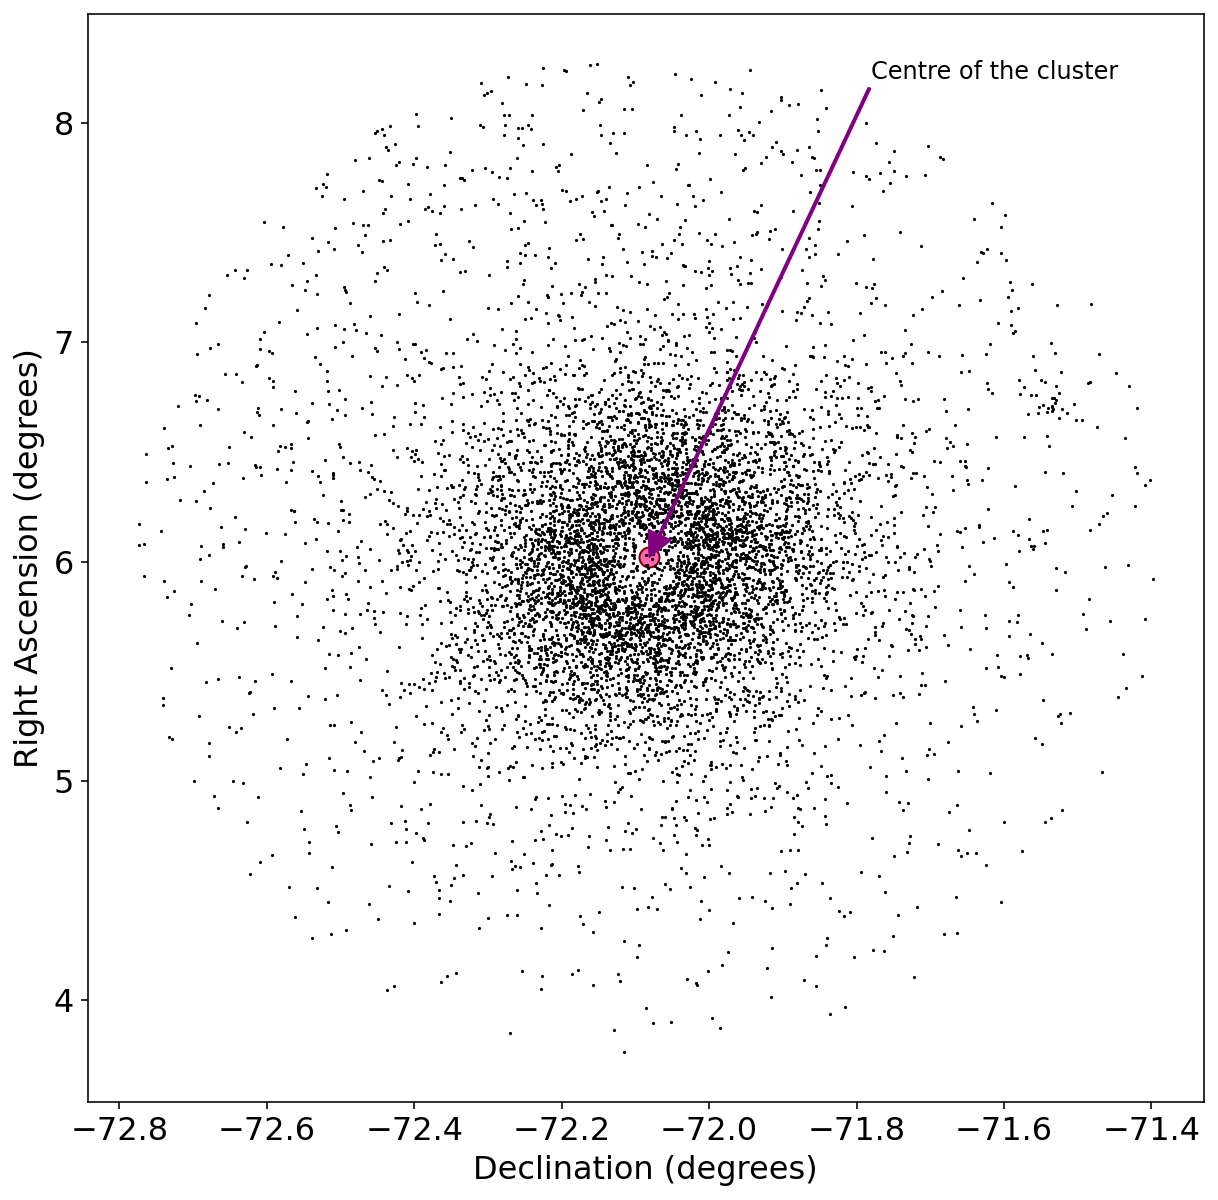

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['dec'], 
            data['ra'],     
            marker='o',             
            markersize = 0.6,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_ylabel('Right Ascension (degrees)')
ax.set_xlabel('Declination (degrees)')

y = [6.022]
x = [-72.081]
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="maroon", markerfacecolor="hotpink")

ax.annotate('Centre of the cluster', xy = (-72.081, 6.022), xytext = (-71.78, 8.2), arrowprops = dict(facecolor = 'purple', edgecolor = 'purple', width = 1), fontsize = 12)

plt.show()

The pink plot indicates the centre of the cluster, which is at Right Ascension= 6.022 deg and Declination= -72.081 deg

The distance of a star from the centre (in degrees) can be calculated using the following formula: $$r_s=\sqrt{(6.022-RA_s)^2 + (-72.081-Dec_s)^2}$$ where RS is the right ascension of the star in degrees, and Dec is the declination of the star in degrees.

The following code calculates this value for each row, and is writing in a column called 'r_s' with these values.

In [7]:
data['r_s'] = np.sqrt((6.022-data['ra'])**2+(-72.081-data['dec'])**2)

data

,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est,r_s
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269,0.614526
1,4689541955754300672,4.999976,-72.646056,19.119717,1.259825,2181.867979,1.167828
2,4689541234199794816,5.225171,-72.642103,18.516747,1.046042,2503.651243,0.974563
3,4689544017338680832,5.331235,-72.556081,19.336916,1.018908,1994.822273,0.838366
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799,0.619588
...,...,...,...,...,...,...,...
7829,4689186710427822208,8.127774,-72.306048,18.929136,1.169840,2307.265411,2.117765
7830,4689185409053789184,7.606001,-72.385654,17.482525,0.769182,3289.627814,1.613032
7831,4689184653139542784,7.839720,-72.398244,19.023027,1.131882,2208.797769,1.845197
7832,4689185988873307392,7.748262,-72.335691,19.135883,0.890472,2233.294279,1.744949


Estimating the radius of the cluster from the plot above:

From observing the part of the plot where the plots are most dense, values for $RA_s$ and $Dec$ can be read from the axes. By substituting these values into the equation for $r_s$, a value can be calculated for the radius of the cluster: $$R_s = \sqrt{(6.022-5.3)^2 + (-72.081+71.85)^2}$$ $$= 0.758053$$ 
To select the stars within the cluster, the rows where the distance from the centre (r_s) is greater than 0.758053 need to be removed:

In [8]:
cluster = data.drop(data[data.r_s>0.758053].index)

cluster

,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est,r_s
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269,0.614526
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799,0.619588
6,4689526910483436160,5.628026,-72.695313,19.636694,1.121590,1958.742422,0.729792
9,4689544262163046272,5.644770,-72.531127,15.588716,1.085757,3938.596124,0.587296
10,4689544464017907328,5.515784,-72.520611,19.491524,1.136385,1981.486932,0.670457
...,...,...,...,...,...,...,...
7736,4688801159794834560,6.441627,-72.616090,18.313730,1.119808,2648.624390,0.680006
7745,4688797620741648384,6.075282,-72.774162,18.625189,0.977505,2572.086062,0.695207
7750,4688797620743625472,6.082449,-72.766610,20.066440,0.644314,1710.694565,0.688270
7766,4688800403880537600,6.324132,-72.685835,19.217085,1.038479,2145.784909,0.676099


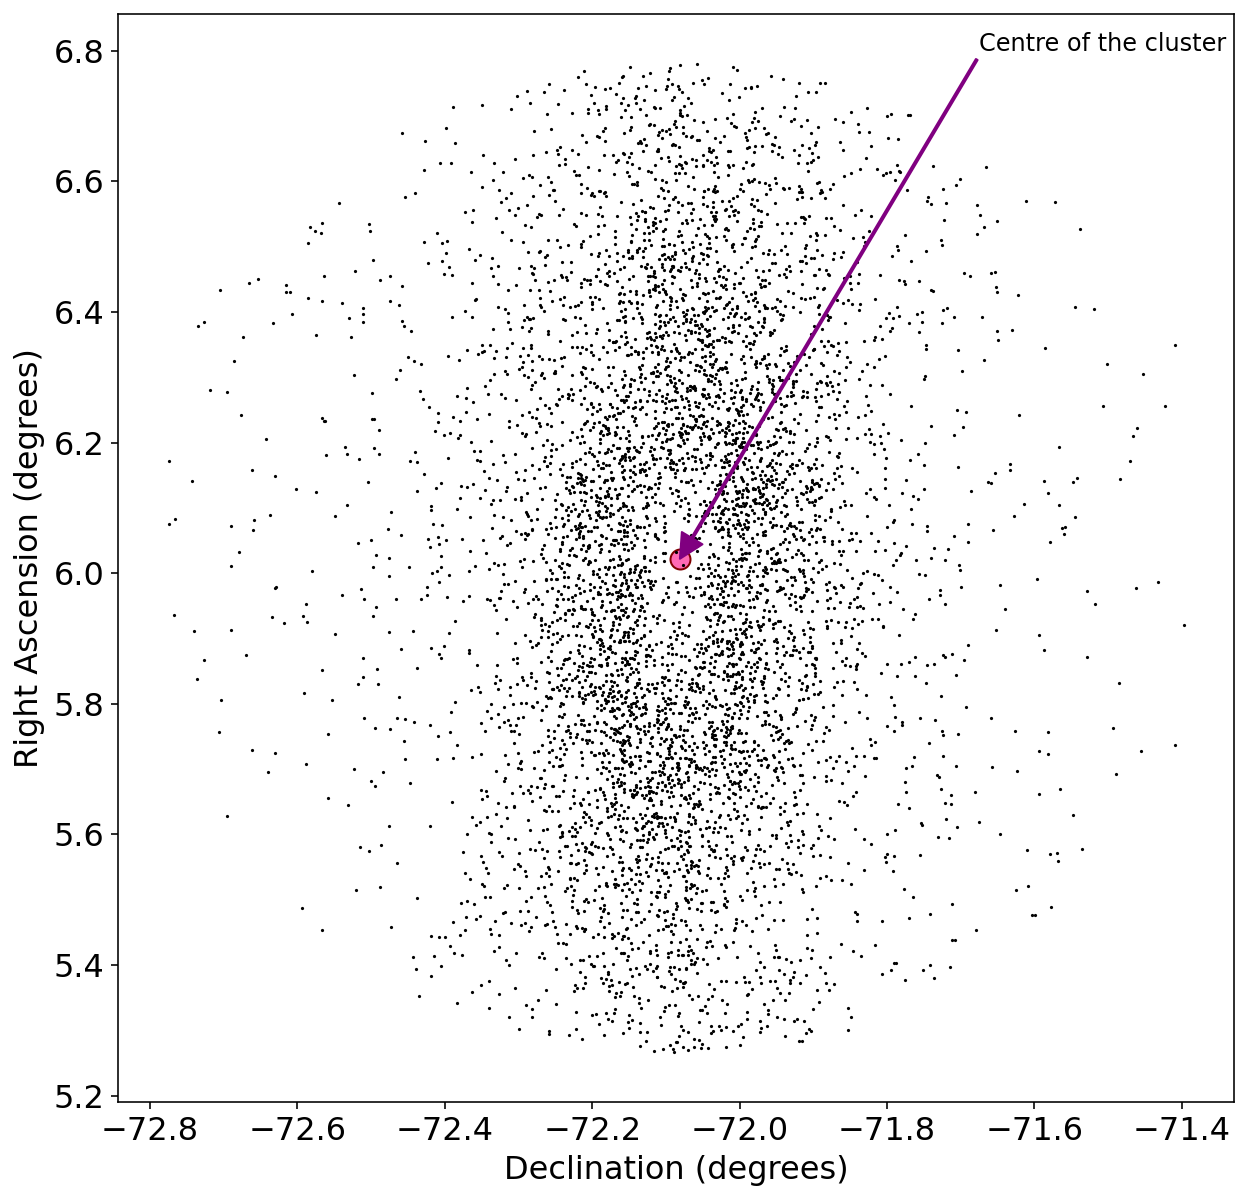

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(cluster['dec'], 
            cluster['ra'],     
            marker='o',             
            markersize = 0.6,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_ylabel('Right Ascension (degrees)')
ax.set_xlabel('Declination (degrees)')

y = [6.022]
x = [-72.081]
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="maroon", markerfacecolor="hotpink")

ax.annotate('Centre of the cluster', xy = (-72.081, 6.022), xytext = (-71.675, 6.8), arrowprops = dict(facecolor = 'purple', edgecolor = 'purple', width = 1), fontsize = 12)

plt.show()

## Colour magnitude diagram

Making a colour magnitude diagram for the stars in the cluster, by plotting their colour, (B - R) in mags, on the x axis and apparent magnitude, G, in mags, on the y axis.

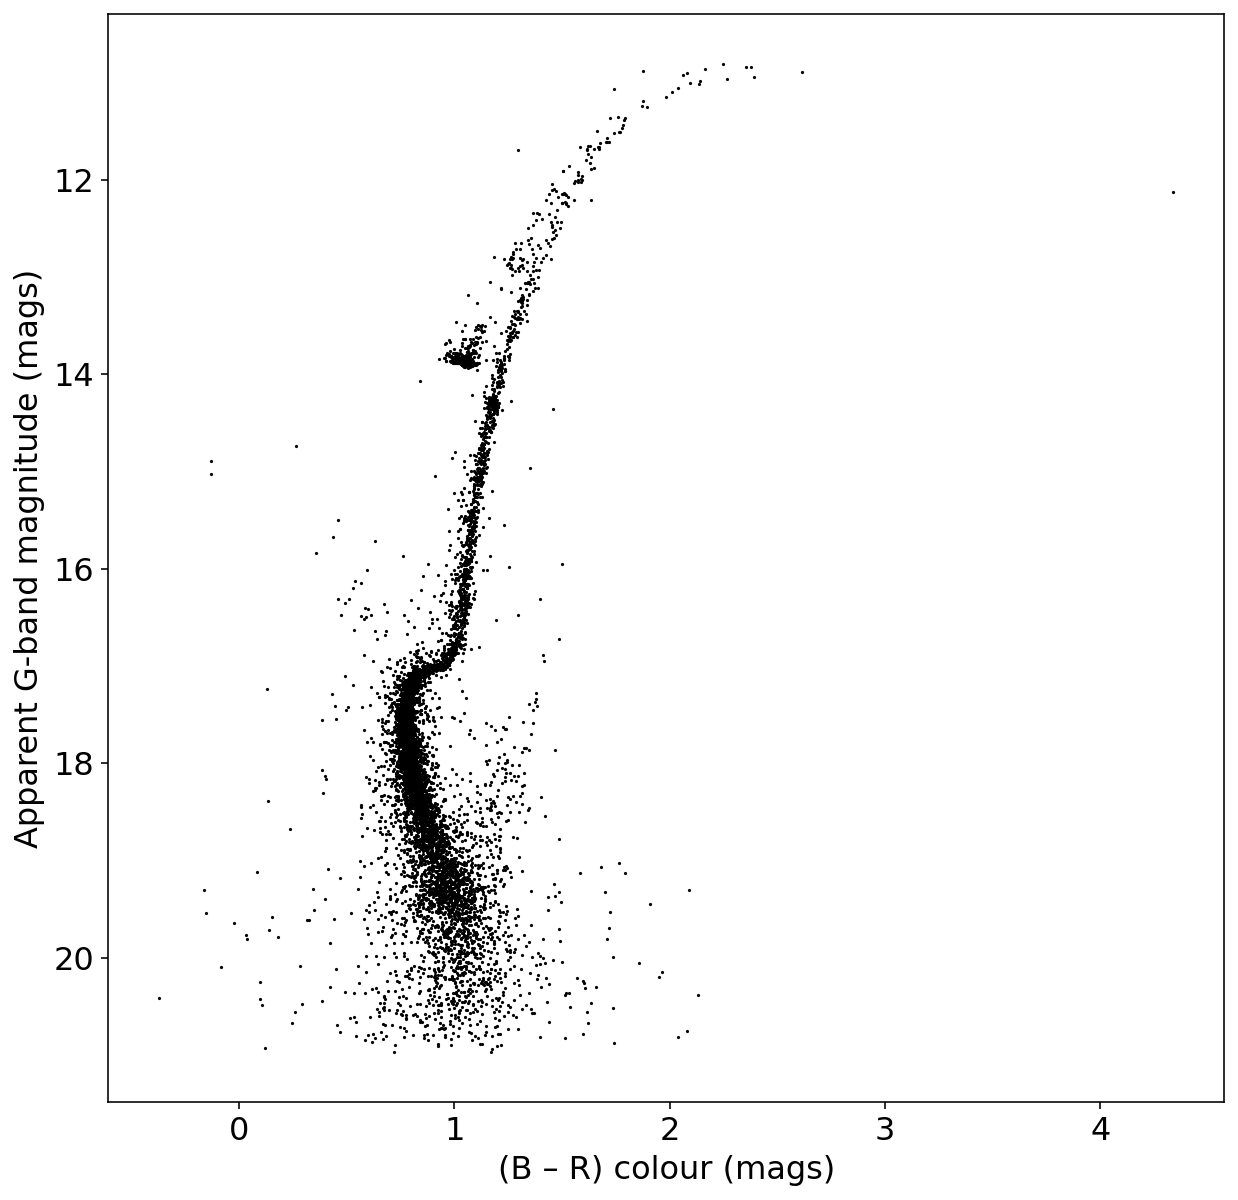

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['bp_rp'], 
            data['phot_g_mean_mag'],     
            marker='o',             
            markersize = 0.6,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('(B – R) colour (mags)')
ax.set_ylabel('Apparent G-band magnitude (mags)')
ax.invert_yaxis()

plt.show()

Using the equations $$𝜇 = 𝑚 − 𝑀$$ and $$𝜇 = 5 log_{10}(d) − 5$$ where 𝜇 is the distance
modulus, M is the absolute magnitude, m is the apparent magnitude and d is the distance in parsecs, to determine the absolute G magnitude of each star. Create a new colour magnitude diagram using the G absolute magnitude and (B – R) colour.

In [11]:
cluster['abs_g_mag'] = data['phot_g_mean_mag'] - (5*(np.log10(data['r_est'])-1))

cluster

,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est,r_s,abs_g_mag
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269,0.614526,6.655560
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799,0.619588,7.680947
6,4689526910483436160,5.628026,-72.695313,19.636694,1.121590,1958.742422,0.729792,8.176807
9,4689544262163046272,5.644770,-72.531127,15.588716,1.085757,3938.596124,0.587296,2.612009
10,4689544464017907328,5.515784,-72.520611,19.491524,1.136385,1981.486932,0.670457,8.006568
...,...,...,...,...,...,...,...,...
7736,4688801159794834560,6.441627,-72.616090,18.313730,1.119808,2648.624390,0.680006,6.198628
7745,4688797620741648384,6.075282,-72.774162,18.625189,0.977505,2572.086062,0.695207,6.573762
7750,4688797620743625472,6.082449,-72.766610,20.066440,0.644314,1710.694565,0.688270,8.900578
7766,4688800403880537600,6.324132,-72.685835,19.217085,1.038479,2145.784909,0.676099,7.559154


Plotting a new colour magnitude diagram using the absolute magnitude G on the Y-axis, with (B-R) on the x-axis again:

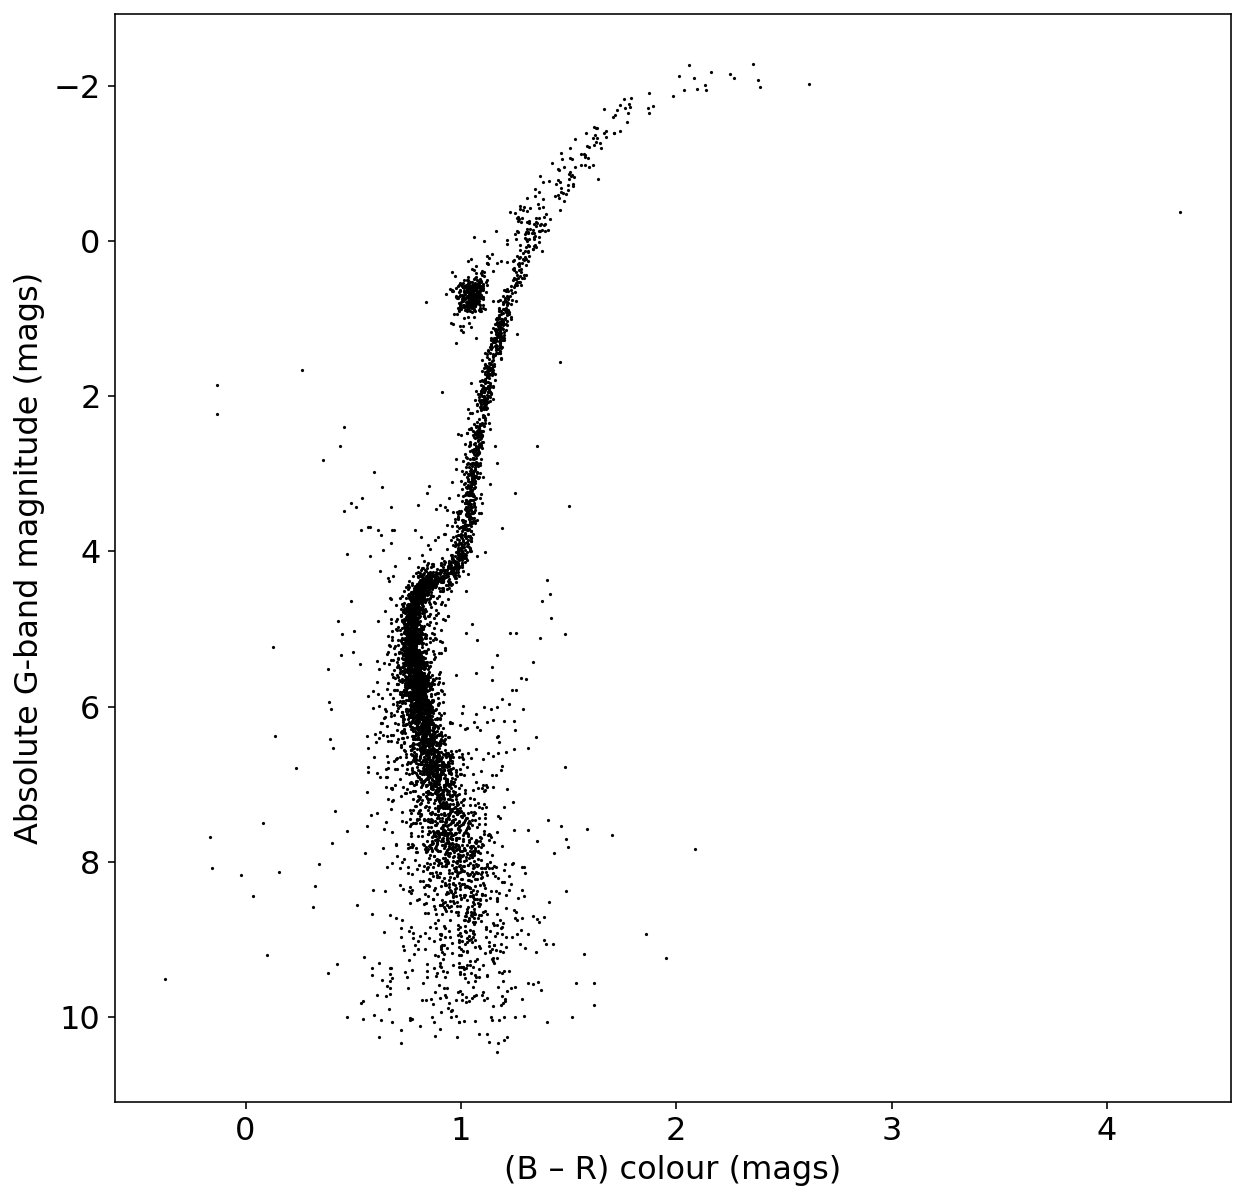

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(cluster['bp_rp'], 
            cluster['abs_g_mag'],     
            marker='o',             
            markersize = 0.6,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )

ax.set_xlabel('(B – R) colour (mags)')
ax.set_ylabel('Absolute G-band magnitude (mags)')
ax.invert_yaxis()

plt.show()

## Hertzsprung-Russel diagram

To make a HR diagram, the physical parameters effective temperature $T_{eff}$ (Kelvin), and the log of the Luminosity $log(L)$ are plotted against each other. To find these values, the following equations are used: 

$$L_{\odot} = 10^{\frac{M_{\odot}-M}{2.5}}$$ 

$$T_{eff} = 4600 [\frac{1}{(0.92(B-R)+1.7}+\frac{1}{0.92(B-R)+0.62}]$$

where $L_{\odot}$ is the luminosity in star luminosities, $M_{\odot}$ is the absolute magnitude of the sun (=4.81), and $(B-R)$ is the star's colour.

Calculating $L_{\odot}$ and $T_{eff}$:

In [13]:
cluster['T_eff'] = 4600*(1/(0.92*(cluster['bp_rp']+1.7))  +  1/(0.92*(cluster['bp_rp']+0.62)))

cluster['lum'] = 10**((4.81- (cluster['abs_g_mag']) /2.5))

cluster['log_lum'] = np.log10(cluster['lum'])

cluster

,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est,r_s,abs_g_mag,T_eff,lum,log_lum
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269,0.614526,6.655560,5029.338671,140.532300,2.147776
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799,0.619588,7.680947,4596.876661,54.653890,1.737621
6,4689526910483436160,5.628026,-72.695313,19.636694,1.121590,1958.742422,0.729792,8.176807,4642.990967,34.616014,1.539277
9,4689544262163046272,5.644770,-72.531127,15.588716,1.085757,3938.596124,0.587296,2.612009,4726.093444,5823.666523,3.765196
10,4689544464017907328,5.515784,-72.520611,19.491524,1.136385,1981.486932,0.670457,8.006568,4609.563499,40.492335,1.607373
...,...,...,...,...,...,...,...,...,...,...,...
7736,4688801159794834560,6.441627,-72.616090,18.313730,1.119808,2648.624390,0.680006,6.198628,4647.050252,214.066520,2.330549
7745,4688797620741648384,6.075282,-72.774162,18.625189,0.977505,2572.086062,0.695207,6.573762,4997.291520,151.528873,2.180495
7750,4688797620743625472,6.082449,-72.766610,20.066440,0.644314,1710.694565,0.688270,8.900578,6087.534681,17.773336,1.249769
7766,4688800403880537600,6.324132,-72.685835,19.217085,1.038479,2145.784909,0.676099,7.559154,4840.641861,61.141822,1.786338


Cutting off the data at 10,000K so that the spread of the main cluster of data covers more of the graph:

In [14]:
cluster = cluster[cluster['T_eff'] < 10000]

Using the effective temperature of the stars and the log of their luminosity to plot a HR diagram::

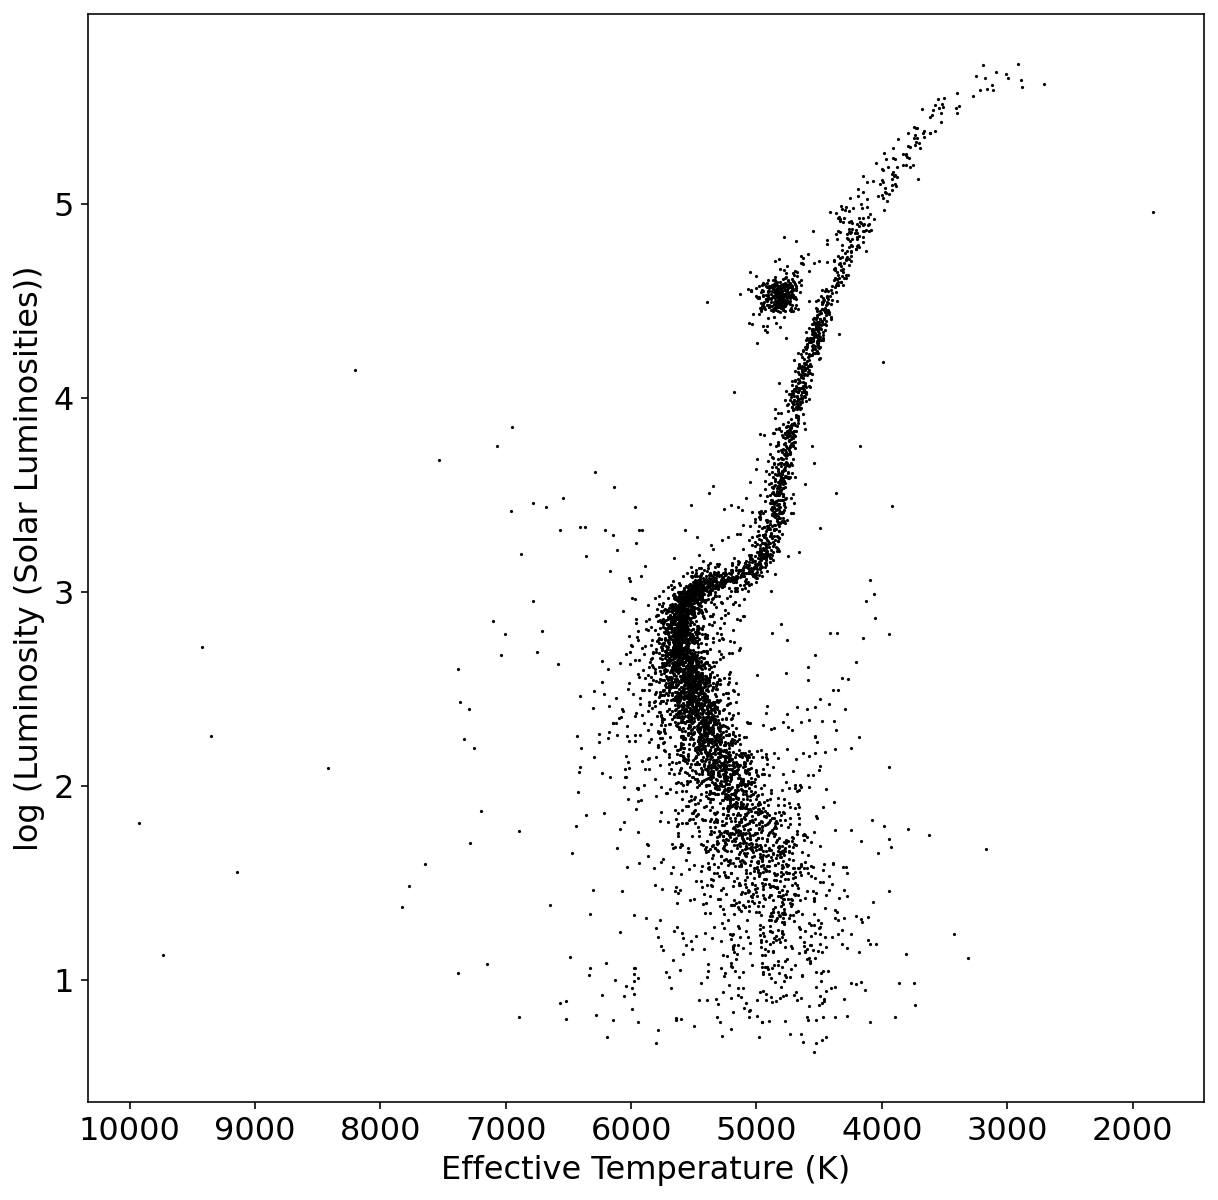

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.errorbar(cluster['T_eff'], 
            cluster['log_lum'],     
            marker='o',             
            markersize = 0.6,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Effective Temperature (K)')
ax.set_ylabel('log (Luminosity (Solar Luminosities))')
ax.invert_xaxis()

plt.show()

$$ \frac{L}{L_{\odot}} = (\frac{R}{R_{\odot}})^2 (\frac{T_{eff}}{T_{eff_{\odot}}})^4$$ 

Using this to estimate the radius $R$ in solar radii, $R_{\odot}$, for each star:

$$  (\frac{R}{R_{\odot}})^2 = \frac{\frac{L}{L_{\odot}}} {(\frac{T_{eff}}{T_{eff_{\odot}}})^4}$$ 

$$  \frac{R}{R_{\odot}} = \sqrt{\frac{\frac{L}{L_{\odot}}} {(\frac{T_{eff}}{T_{eff_{\odot}}})^4}}$$ 

Using this equation to add a new column to the data called s_r_rodot, meaning the stars radius in solar radii:

In [16]:
cluster['s_r_rodot'] = np.sqrt((cluster['lum'])*((5756 / cluster['T_eff'])**4))

cluster

C:\Users\local_mp2521\Temp\ipykernel_20372\3445606843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['s_r_rodot'] = np.sqrt((cluster['lum'])*((5756 / cluster['T_eff'])**4))


,source_id,ra,dec,phot_g_mean_mag,bp_rp,r_est,r_s,abs_g_mag,T_eff,lum,log_lum,s_r_rodot
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,2497.265269,0.614526,6.655560,5029.338671,140.532300,2.147776,15.527727
4,4689544498377649920,5.580270,-72.515469,19.275023,1.142059,2083.603799,0.619588,7.680947,4596.876661,54.653890,1.737621,11.591147
6,4689526910483436160,5.628026,-72.695313,19.636694,1.121590,1958.742422,0.729792,8.176807,4642.990967,34.616014,1.539277,9.042415
9,4689544262163046272,5.644770,-72.531127,15.588716,1.085757,3938.596124,0.587296,2.612009,4726.093444,5823.666523,3.765196,113.197077
10,4689544464017907328,5.515784,-72.520611,19.491524,1.136385,1981.486932,0.670457,8.006568,4609.563499,40.492335,1.607373,9.922209
...,...,...,...,...,...,...,...,...,...,...,...,...
7736,4688801159794834560,6.441627,-72.616090,18.313730,1.119808,2648.624390,0.680006,6.198628,4647.050252,214.066520,2.330549,22.447150
7745,4688797620741648384,6.075282,-72.774162,18.625189,0.977505,2572.086062,0.695207,6.573762,4997.291520,151.528873,2.180495,16.331268
7750,4688797620743625472,6.082449,-72.766610,20.066440,0.644314,1710.694565,0.688270,8.900578,6087.534681,17.773336,1.249769,3.769148
7766,4688800403880537600,6.324132,-72.685835,19.217085,1.038479,2145.784909,0.676099,7.559154,4840.641861,61.141822,1.786338,11.056174


Colour-coding the plots by radius with the largest radii being dark blue, and the smaller ones in red.

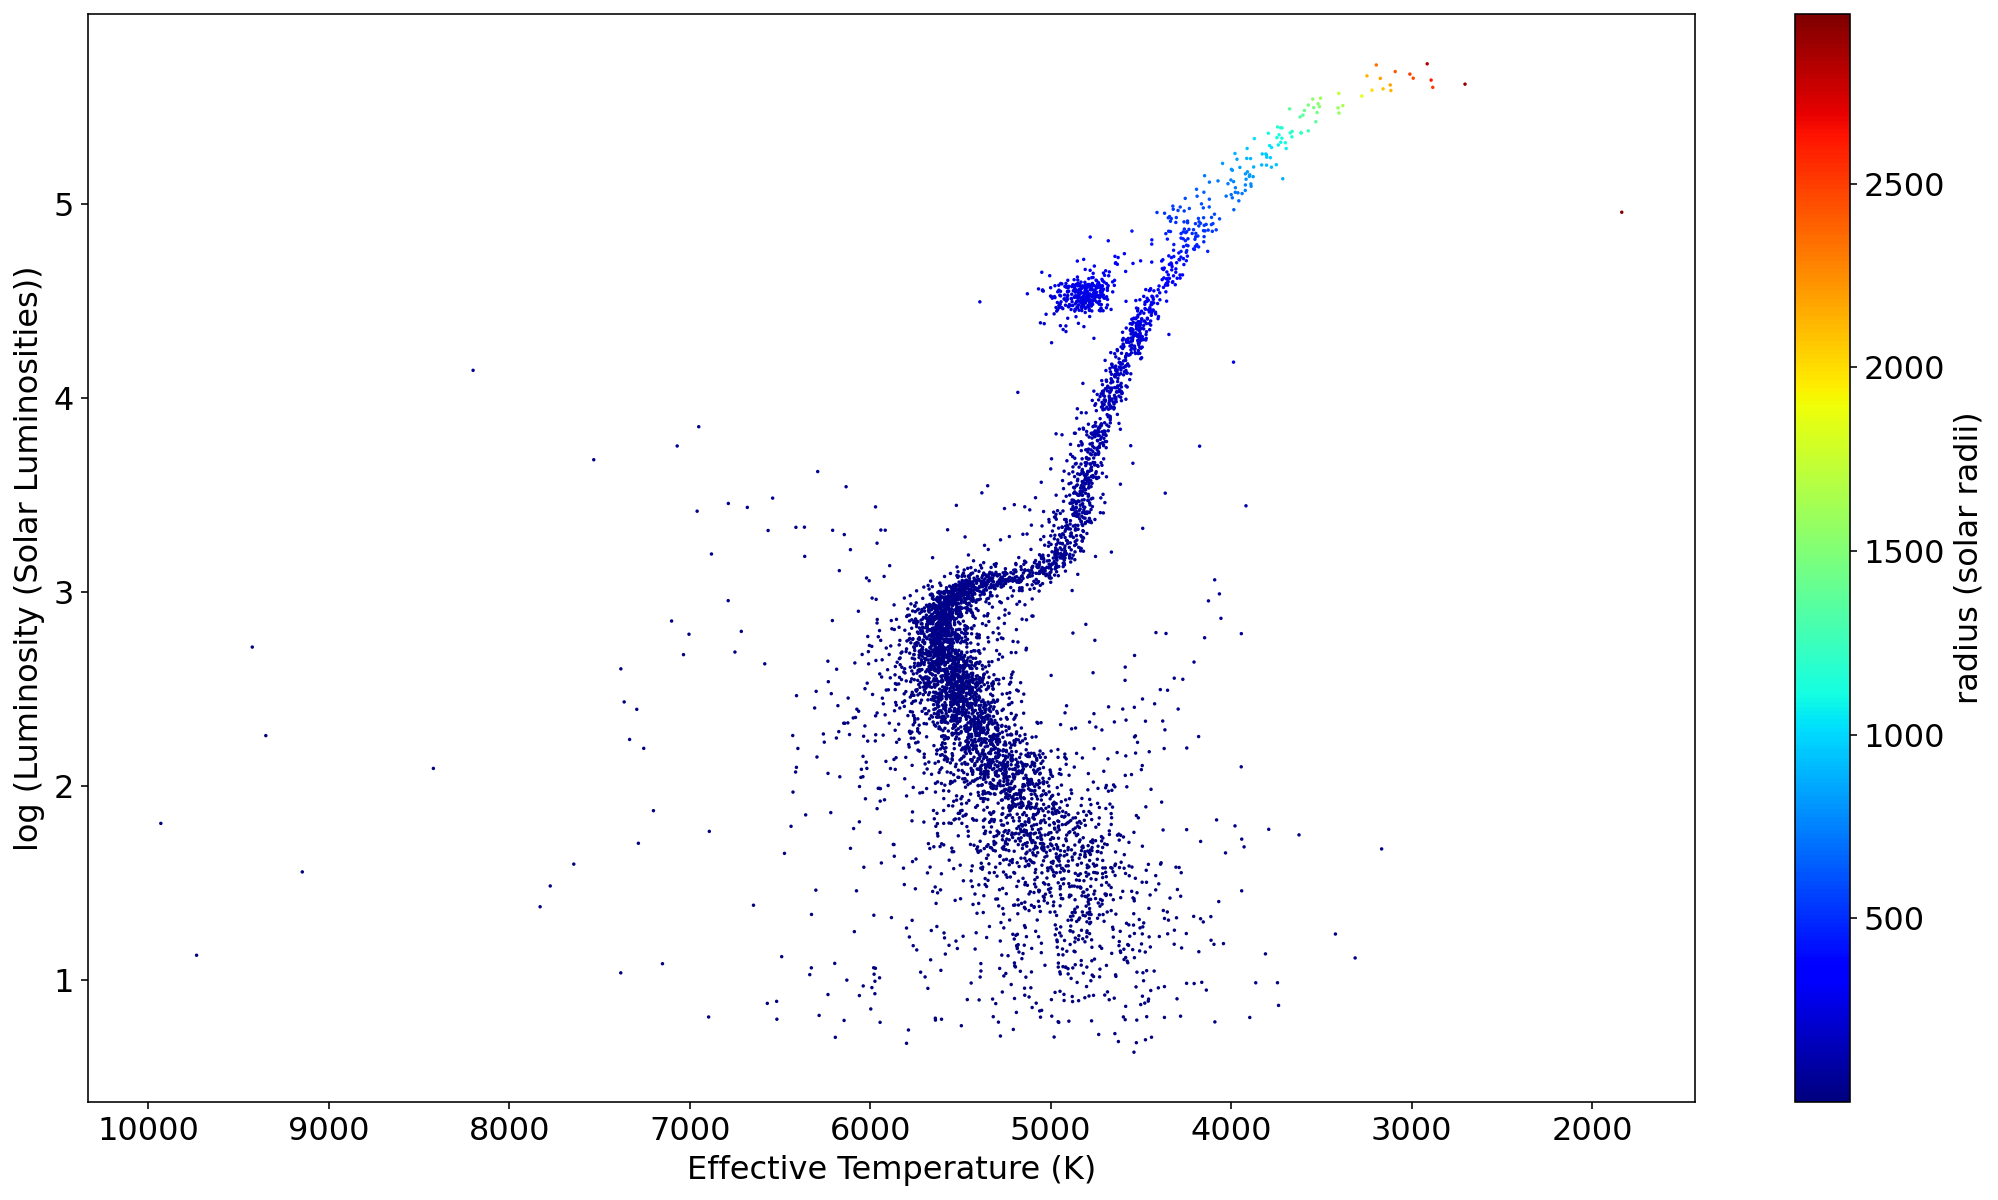

In [17]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('plasma')
sc = ax.scatter(cluster['T_eff'], cluster['log_lum'], c=cluster['s_r_rodot'], s=3, marker='o', label='I', cmap='jet', edgecolor='none')

ax.set_xlabel('Effective Temperature (K)')
ax.set_ylabel('log (Luminosity (Solar Luminosities))')
ax.invert_xaxis()

cbar = plt.colorbar(sc)
cbar.set_label('radius (solar radii)')
plt.show()

## Conclusion

By combining the data from the files 47tuc_positions.csv and 47tuc_gaia_data.csv, firstly a graph of right ascension against declination was plotted, which allowed us to see the position of the stars in the cluster, which meant the radius of the cluster could be estimated by seeing where the densest part of the cluster was. The radius was estimated to be  0.758053 deg, equivalent to 45 arcminutes, aligning with known, published data. Using this value, the data was narrowed down to include only the stars within the main cluster.

A colour magnitude diagram for the stars in the cluster was created by plotting their colour, (B - R) in mags, on the x-axis and apparent magnitude, G, in mags, on the y-axis. After calculating the absolute magnitude of the stars then a new one was made using their absolute magnitudes in place of apparent magnitude.

A H-R diagram was then plotted of the cluster using effective temperature $T_{eff}$ (Kelvin) on the x-axis, and Luminosity $L$. The radius of each star in solar radii was calculated, and thus the H-R diagram was plotted again with the points colour-coded by radius, to create a completed H-R diagram. This is useful because the position of the stars on the H-R diagram gives us more information about the star and its stage of evolution.